# 2016 US Elections Analysis
<br>

# Introduction
<br>

  In 2016, despite losing the popular vote by 3 million ballots, Donald Trump shocked the democratic world by securing a decisive victory in the Ellectoral College, leading him to the US presidency.
  <br>
  <br>
  I traveled back in time to understand the dynamics of this unexpected result and provide crucial information for the Democratic Party as they prepare for the 2020 presidential race. By analyzing voter behaviour and demographic trends from the 2016 election the aim is to develop more effective strategies to appeal to the Ellectoral College and ensure a successful campaign.
  <br>
  <br>  
  The US democrats provided me with a [Kaggle](https://www.kaggle.com/datasets/benhamner/2016-us-election) dataset that will be central to my analysis.
  <br>
  <br>
<ul>
    <li>1. Loading and data overview
        <ul>
            <li>1a. Primary results</li>
            <li>1b. County facts</li>
        </ul>
    </li>
    <li>2. State level regional analysis
    </li>
    <li>3. Correlation with US census data.
    </li>
    <li>4. Summary
    </li>
</ul>

# 1. Loading and data overview

We have a few files contained in our dataset.
* Primary results
* County facts
* County facts dictionary

Let's inspect each of these one by one.<br>
<br>
We'll also be using the following modules:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import folium
import geopandas as gpd
import branca.colormap as cm

Functions used in the notebook:

In [2]:
def style_function(feature):
    state = feature['properties']['name']
    value = state_dict.get(state, 0)
    return {
        'fillColor': colormap(value),
        'color': 'black',
        'weight': 2,
        'fillOpacity':1
    }

## 1a. Primary results

In [3]:
primary_results = pd.read_csv('primary_results.csv')

primary_results.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078


Here we have the state, state code, county, fips code, party of the candidate, the candidate's name, number of votes and fraction of the total votes.<br>
<br>
Let's inspect the shape of this dataset.

In [4]:
primary_results.shape

(24611, 8)

We have 8 columns and 24611 rows.<br>
<br>
Now we get a summary of the dataset, including data types and non-null counts with .info()

In [5]:
primary_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24611 entries, 0 to 24610
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               24611 non-null  object 
 1   state_abbreviation  24611 non-null  object 
 2   county              24611 non-null  object 
 3   fips                24511 non-null  float64
 4   party               24611 non-null  object 
 5   candidate           24611 non-null  object 
 6   votes               24611 non-null  int64  
 7   fraction_votes      24611 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 1.5+ MB


The data types are appropriate for the types of data contained within each column. <br>
<br>
The majority of the dataset is complete, with the exception of the **fips** column.<br>
<br>
This column represents the Federal Information Processing Standards code, which uniquely identifies counties. We will investigate the missing values only if we decide to use them further in our analysis.<br>
<br>
Now we generate descriptive statistics for numerical columns:

In [6]:
primary_results.describe()

,fips,votes,fraction_votes
count,2.451100e+04,24611.000000,24611.000000
mean,2.667152e+07,2306.252773,0.304524
std,4.200978e+07,9861.183572,0.231401
min,1.001000e+03,0.000000,0.000000
25%,2.109100e+04,68.000000,0.094000
50%,4.208100e+04,358.000000,0.273000
75%,9.090012e+07,1375.000000,0.479000
max,9.560004e+07,590502.000000,1.000000


The fips column is just a code so we ignore it here.
<br>
<br>
<ul>
    <li>Votes
        <ul>
            <li>Mean: The average number of votes cast per entry is approximately 2,306.</li>
            <li>Median: The median number of votes is 358.</li>
            <li>Standard Deviation: There is a high variability in the number of votes, with a standard deviation of approximately 9,861 votes.</li>
            <li>Minimum: The minimum number of votes recorded is 0.</li>
            <li>Maximum: The highest number of votes recorded in a single entry is 590,502.</li>
        </ul>
    </li>
    <li>Fraction votes
        <ul>
            <li>Mean: The average fraction of votes received by a candidate is approximately 0.305, or 30.5%.</li>
            <li>Median: The median fraction of votes is 0.273, or 27.3%</li>
            <li>Standard Deviation: The fraction of votes also shows considerable variability, with a standard deviation of approximately 0.231, or 23.1%</li>
            <li>Minimum: The minimum fraction of votes is 0, indicating that some candidates received no votes in certain entries.</li>
            <li>Maximum: The maximum fraction of votes is 1, indicating that in some entries, a candidate received all the votes.</li>
        </ul>
    </li>
</ul>
<br>
<br>
The dataset shows considerable variability ranging from candidates getting no votes to all the votes in certain areas and highlights the need for targeted analysis.<br>
<br>
Another thing we can do is to look at the unique values for the categorical columns:

In [7]:
primary_results.select_dtypes(include=['object']).apply(lambda col: print(col.value_counts()))

state
Massachusetts     2808
Texas             1778
Vermont           1722
Iowa              1485
Georgia           1113
Maine              994
Virginia           931
Connecticut        845
Kentucky           720
Missouri           690
Tennessee          665
Illinois           618
North Carolina     600
Oklahoma           539
Ohio               528
Arkansas           525
Michigan           498
Mississippi        492
Alabama            469
Nebraska           465
Indiana            460
Florida            402
Louisiana          384
South Carolina     368
Wisconsin          360
Pennsylvania       335
South Dakota       330
New York           310
California         290
Montana            280
Alaska             280
West Virginia      275
Idaho              264
Rhode Island       205
Washington         195
Oregon             180
New Mexico         165
Utah               145
Colorado           128
Maryland           120
Nevada             119
New Jersey         105
New Hampshire      100
Wyomi

state                 None
state_abbreviation    None
county                None
party                 None
candidate             None
dtype: object

### State
<br>
The dataset includes data from all U.S. states, with Massachusetts (2808 entries) having the most entries, followed by Texas (1778) and Vermont (1722). This suggests that these states had a high level of reporting or participation in the primary elections.<br>
<br>
States with fewer entries include Delaware (15), Kansas (24), and Hawaii (24), which could indicate lower participation or fewer reporting counties in these states.<br>
<br>
I will go more in depth with our second file 'county_facts.csv' further on, however it contains the population info so I will include it briefly here to look at the population sizes of the states and counties which have the most and least entries for comparison.

In [8]:
demographics = pd.read_csv('county_facts.csv')

demographics.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


Let's see if we can find the populations for Massachusetts, Texas, Vermont, Delaware, Kansas and Hawaii.

In [9]:
states = demographics.loc[demographics['area_name']\
                 .isin(['Massachusetts','Texas', 'Vermont', 'Delaware', 'Kansas', 'Hawaii']),['area_name','POP010210']]
states.set_index('area_name', inplace=True)
states

,POP010210
area_name,
Delaware,897934
Hawaii,1360301
Kansas,2853118
Massachusetts,6547629
Texas,25145561
Vermont,625741


Thus we can compare the number of voting entries with the populations:

In [10]:
votes_data = {
    'state': ['Massachusetts', 'Texas', 'Vermont', 'Delaware', 'Kansas', 'Hawaii'],
    'votes': [2808, 1778, 1722, 15, 24, 24]
}
rounded_population_data = {
    'state': ['Massachusetts', 'Texas', 'Vermont', 'Delaware', 'Kansas', 'Hawaii'],
    'population': ['6.5M', '25M', '626K', '898K', '2.9M', '1.4M']
}

votes_df = pd.DataFrame(votes_data)
pop_df = pd.DataFrame(rounded_population_data)

merged_df = votes_df.merge(pop_df, on='state')
merged_df.set_index('state', inplace=True)
merged_df

,votes,population
state,,
Massachusetts,2808,6.5M
Texas,1778,25M
Vermont,1722,626K
Delaware,15,898K
Kansas,24,2.9M
Hawaii,24,1.4M


Let's add another column to count how many voting entries there are per 10K of the population for these states just to get a glimpse of how correlated these values might be.

In [11]:
vote_pop_ratio = merged_df.merge(states, left_on='state', right_on='area_name')
vote_pop_ratio['ratio'] = (vote_pop_ratio['votes'] / vote_pop_ratio['POP010210']) * 10000
vote_pop_ratio.drop('POP010210', axis=1)

,votes,population,ratio
0,2808,6.5M,4.288575
1,1778,25M,0.707083
2,1722,626K,27.519373
3,15,898K,0.167050
4,24,2.9M,0.084118
5,24,1.4M,0.176432


Based on our derivative statistic we immediately see that it's possible for states to have a high population with low voting entries and vice versa.<br>
<br>
In this list Vermont seems to be very politically active while Kansas and Delaware seem to be highly inactive.<br>
<br>
We will come back to this statistic later to see which states could be considered the most and least politically active.<br>
<br>
Let's investigate the other categorical columns.

In [12]:
primary_results.select_dtypes(include=['object']).apply(lambda col: print(col.value_counts()))

state
Massachusetts     2808
Texas             1778
Vermont           1722
Iowa              1485
Georgia           1113
Maine              994
Virginia           931
Connecticut        845
Kentucky           720
Missouri           690
Tennessee          665
Illinois           618
North Carolina     600
Oklahoma           539
Ohio               528
Arkansas           525
Michigan           498
Mississippi        492
Alabama            469
Nebraska           465
Indiana            460
Florida            402
Louisiana          384
South Carolina     368
Wisconsin          360
Pennsylvania       335
South Dakota       330
New York           310
California         290
Montana            280
Alaska             280
West Virginia      275
Idaho              264
Rhode Island       205
Washington         195
Oregon             180
New Mexico         165
Utah               145
Colorado           128
Maryland           120
Nevada             119
New Jersey         105
New Hampshire      100
Wyomi

state                 None
state_abbreviation    None
county                None
party                 None
candidate             None
dtype: object

### Party
<br>
We can see a higher number of entries for the Republican primaries with 15,652 entries vs. 8,959 entries for Democratic candidates. This might be due to a high number of Republican candidates.<br>
<br>

### County
<br>
The dataset covers 2633 unique counties, with Washington (182 entries), Franklin (158), and Jefferson (154) having the most entries. This indicates that certain counties are more prominent in the dataset, which could be due to their larger population sizes or higher voter engagement. We will look at how the population sizes and voting counts look on the county level in comparison further on.<br>
<br>

### Candidate
<br>
Both Bernie Sanders and Hillary Clinton have an equal number of entries (4205 each) among Democratic candidates, indicating a competitive primary. On the Republican side, Donald Trump, John Kasich, and Ted Cruz each have 3586 entries, showing a competitive race among these candidates.<br>
<br>
Lesser-known candidates and those with fewer entries, such as Jeb Bush (155) and Carly Fiorina (109), have less impact on the overall dataset.<br>
<br>
Finally for this section let's look at some aggregate statistics for the two main candidates - Hillary Clinton and Donald Trump:

In [13]:
two_candidates = primary_results[primary_results['candidate'].isin(['Hillary Clinton', 'Donald Trump'])]

summary_stats = two_candidates.groupby('candidate').agg({
    'votes': ['count', 'mean', 'std', 'min', 'max'],
    'fraction_votes': ['count', 'mean', 'std', 'min', 'max']
})

summary_stats

votes                                        fraction_votes  \
                count         mean           std min     max          count   
candidate                                                                     
Donald Trump     3586  3709.576408   8999.496654   0  179130           3586   
Hillary Clinton  4205  3731.855410  16912.158118   0  590502           4205   

                                                 
                     mean       std  min    max  
candidate                                        
Donald Trump     0.466217  0.153507  0.0  0.915  
Hillary Clinton  0.461302  0.204810  0.0  1.000

On average, Hillary Clinton received slightly more votes per entry compared to Donald Trump (3731 vs. 3709).<br>
<br>
The standard deviation is much higher for Hillary Clinton(16912 vs. 8999), indicating a larger spread and more variability in the number of votes she received.<br>
<br>
Mean fraction of votes:<br>
Donald Trump: 0.4662 (46.62%)
Hillary Clinton: 0.4613 (46.13%)<br>
Both candidates have a similar average fraction of votes, with Trump slightly ahead.<br>
<br>
The maximum number of votes received is much higher for Hillary Clinton with 590K vs. 179K for Donald Trump.<br><br>
Let's also look at the number of states where Hillary won, Trump won, both won or neither did and visualize this on a barplot.

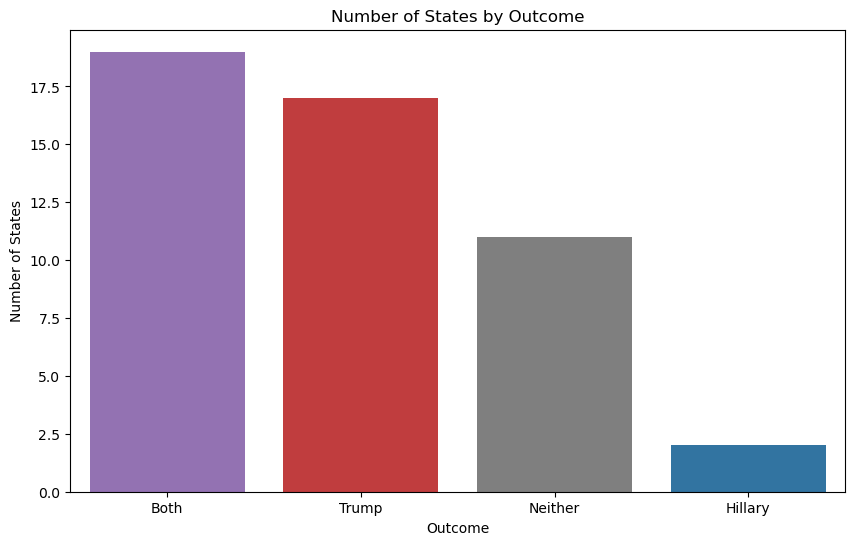

In [14]:
democrats = primary_results[primary_results['party'] == 'Democrat']
republicans = primary_results[primary_results['party'] == 'Republican']

democrat_max_fraction = democrats.loc[democrats.groupby('state')['fraction_votes'].idxmax()]
republican_max_fraction = republicans.loc[republicans.groupby('state')['fraction_votes'].idxmax()]

hillary_states = democrat_max_fraction[democrat_max_fraction['candidate'] == 'Hillary Clinton']
trump_states = republican_max_fraction[republican_max_fraction['candidate'] == 'Donald Trump']

hillary_states_list = hillary_states['state'].tolist()
trump_states_list = trump_states['state'].tolist()

states = primary_results['state'].unique()
result = []

for state in states:
    hillary_won = state in hillary_states_list
    trump_won = state in trump_states_list
    
    if hillary_won and trump_won:
        result.append({'state': state, 'outcome': 'Both'})
    elif hillary_won:
        result.append({'state': state, 'outcome': 'Hillary'})
    elif trump_won:
        result.append({'state': state, 'outcome': 'Trump'})
    else:
        result.append({'state': state, 'outcome': 'Neither'})

result_df = pd.DataFrame(result)

outcome_counts = result_df['outcome'].value_counts().reset_index()
outcome_counts.columns = ['outcome', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(data=outcome_counts, x='outcome', y='count', palette = ['#9467bd','#d62728', '#7f7f7f', '#1f77b4'])
plt.xlabel('Outcome')
plt.ylabel('Number of States')
plt.title('Number of States by Outcome')
plt.show()

In [15]:
result_df.groupby('outcome').count().sort_values('state',ascending=True)

,state
outcome,
Hillary,2
Neither,11
Trump,17
Both,19


Wow! Only two states where only Hillary had the majority of votes, 30 where either both or neither did and 17 for Trump.

# 1b. County Facts
Let's move on to the second file in our dataset which contains the demographic data on counties from US census.<br>
<br>
The third file 'county_facts_dictionary.csv' will also be included here as it contains the descriptions of the coded columns in the County Facts file.

In [16]:
demographics.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


### Columns

1. 'fips'

"FIPS" stands for Federal Information Processing Standards. These are codes used to uniquely identify geographic areas, such as states and counties, within the United States. This is generally for consistency across data and will not be helpful in our analysis but it can be used to merge data on from the primary results dataset.

2. 'area_name'

As we can see already after printing the head the area might hold county level information, state level information or country level information.

3. 'state_abbreviation'

State code.


The democratic party also provided us with a **description** of the coded column names:

In [17]:
pd.set_option('display.max_colwidth', 5000)
column_descriptions = pd.read_csv('county_facts_dictionary.csv')
column_descriptions

,column_name,description
0,PST045214,"Population, 2014 estimate"
1,PST040210,"Population, 2010 (April 1) estimates base"
2,PST120214,"Population, percent change - April 1, 2010 to July 1, 2014"
3,POP010210,"Population, 2010"
4,AGE135214,"Persons under 5 years, percent, 2014"
5,AGE295214,"Persons under 18 years, percent, 2014"
6,AGE775214,"Persons 65 years and over, percent, 2014"
7,SEX255214,"Female persons, percent, 2014"
8,RHI125214,"White alone, percent, 2014"
9,RHI225214,"Black or African American alone, percent, 2014"


Let's go through the process of initial examination we used on the **primary results** dataset now on the **county facts.**

In [18]:
demographics.shape

(3195, 54)

We have 51 column descriptions and the three columns described earlier which adds up to 54 columns so all features are accounted for. The dataset contains 3195 rows.

In [19]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195 entries, 0 to 3194
Data columns (total 54 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fips                3195 non-null   int64  
 1   area_name           3195 non-null   object 
 2   state_abbreviation  3143 non-null   object 
 3   PST045214           3195 non-null   int64  
 4   PST040210           3195 non-null   int64  
 5   PST120214           3195 non-null   float64
 6   POP010210           3195 non-null   int64  
 7   AGE135214           3195 non-null   float64
 8   AGE295214           3195 non-null   float64
 9   AGE775214           3195 non-null   float64
 10  SEX255214           3195 non-null   float64
 11  RHI125214           3195 non-null   float64
 12  RHI225214           3195 non-null   float64
 13  RHI325214           3195 non-null   float64
 14  RHI425214           3195 non-null   float64
 15  RHI525214           3195 non-null   float64
 16  RHI625

The columns mostly contain non-null values, with the exception of state_abbreviation which has 52 null values.<br>
<br>
The other columns are mostly non-null numerical data which is to be expected for a demographics dataset.<br>
<br>
Let's look at the missing state abbreviations and see what's going on.

In [20]:
demographics[demographics['state_abbreviation'].isnull()]

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
69,2000,Alaska,NaN,736732,710249,3.7,710231,7.4,25.3,9.4,...,0.0,25.9,8204030,4563605,9303387,13635,1851293,1518,570640.95,1.2
99,4000,Arizona,NaN,6731484,6392310,5.3,6392017,6.4,24.1,15.9,...,10.7,28.1,57977827,57573459,86758801,13637,13268514,26997,113594.08,56.3
115,5000,Arkansas,NaN,2966369,2915958,1.7,2915918,6.5,23.8,15.7,...,2.3,24.5,60735582,29659789,32974282,11602,3559795,7666,52035.48,56.0
191,6000,California,NaN,38802500,37254503,4.2,37253956,6.5,23.6,12.9,...,16.5,30.3,491372092,598456486,455032270,12561,80852787,83645,155779.22,239.1
250,8000,Colorado,NaN,5355866,5029324,6.5,5029196,6.3,23.3,12.7,...,6.2,29.2,46331953,53598986,65896788,13609,11440395,28686,103641.89,48.5
315,9000,Connecticut,NaN,3596677,3574096,0.6,3574097,5.3,21.6,15.5,...,4.2,28.1,58404898,107917037,52165480,14953,9138437,5329,4842.36,738.1
324,10000,Delaware,NaN,935614,897936,4.2,897934,6.0,21.8,16.4,...,2.1,26.1,25679939,5727401,14202083,16421,1910770,5194,1948.54,460.8
328,11000,District Of Columbia,NaN,658893,601767,9.5,601723,6.5,17.5,11.3,...,6.1,34.5,332844,2117990,3843716,6555,4278171,4189,61.05,9856.5


So as we can see there is no state abbreviation for the data points that are of state level and not for the ones which contains country level information. However there are 50 states and 1 entry for 'USA'. So I am wondering what the last missing value could be.

In [21]:
state_names = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", 
    "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", 
    "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", 
    "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", 
    "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", 
    "New Hampshire", "New Jersey", "New Mexico", "New York", 
    "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", 
    "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", 
    "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", 
    "West Virginia", "Wisconsin", "Wyoming"
]
demographics[demographics['state_abbreviation'].isnull()& ~demographics['area_name'].isin(state_names)]

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
328,11000,District Of Columbia,NaN,658893,601767,9.5,601723,6.5,17.5,11.3,...,6.1,34.5,332844,2117990,3843716,6555,4278171,4189,61.05,9856.5


Washington D.C. is the capital city and federal district of the United States. It is not a county and does not belong to any state.

After a closer inspection of the column descriptions it becomes apparent that perhaps not all the columns will be useful in our analysis, but there are definitely ways to make targeted analysis based on ethnic background, income, education, house or business ownership that can help understand which candidate appeals better to which demographic.<br>
<br>
The volume of data is too large to go through each column and provide summary statistics so instead we will dive deeper into the columns of interest while performing our main analysis.

## 2. State level regional analysis

We have went over our dataset with a broad overview and now it's time to look a little closer. Our analysis will focus on the two main candidates - Donald Trump and Hillary Clinton. First of we'll look at the number and percentage of votes received by each candidate and later we'll visualize this data using folium.

In [22]:
trump_results = primary_results[primary_results['candidate'] == 'Donald Trump']

grouped_trump_results = trump_results.groupby('state')[['votes', 'fraction_votes']]\
                        .agg({'votes':'sum','fraction_votes':'mean'})\
                        .sort_values(by='fraction_votes', ascending=False)\
                        .reset_index()
grouped_trump_results.head(5)

,state,votes,fraction_votes
0,New Jersey,356697,0.796524
1,West Virginia,156245,0.791491
2,Washington,403003,0.780231
3,California,1174829,0.769500
4,Montana,114056,0.756661


Trump performed most successfully in New Jersey, West Virginia, Washington, California and Montana based on the fraction of votes.

In [23]:
grouped_trump_results.tail(5)

,state,votes,fraction_votes
41,Texas,757618,0.291642
42,Iowa,45419,0.268717
43,Kansas,17062,0.230750
44,Utah,24864,0.204759
45,Wyoming,70,0.087083


Trump performed the poorest in Wyoming, Utah, Kansas, Iowa and Texas based on the fraction of votes.<br>
<br>
Let's visualize the fraction of votes received by Trump in the Republican primaries in each US state using folium's Cloropleth.

In [24]:
us_states = 'us-states.json'
m = folium.Map([34, -96], zoom_start=4)

folium.Choropleth(
    geo_data=us_states,
    data=grouped_trump_results,
    columns=["state", "fraction_votes"],
    key_on="feature.properties.name",
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Fraction of Votes for Trump in Primaries"
).add_to(m)

m

Now let's do the same for Hillary Clinton:

In [25]:
hillary_results = primary_results[primary_results['candidate'] == 'Hillary Clinton']

grouped_hillary_results = hillary_results.groupby('state')[['votes', 'fraction_votes']]\
                        .agg({'votes':'sum','fraction_votes':'mean'})\
                        .sort_values(by='fraction_votes', ascending=False)\
                        .reset_index()
grouped_hillary_results.head(5)

,state,votes,fraction_votes
0,Mississippi,182447,0.827866
1,South Carolina,271514,0.785326
2,Alabama,309928,0.761269
3,Georgia,543008,0.735182
4,Louisiana,221615,0.672484


Hillary performed the most successfully in Missipi, South Caroline, Alabama, Georgia and Louisiana based on the fraction of votes for the Democratic Primaries.

In [26]:
grouped_hillary_results.tail(5)

,state,votes,fraction_votes
44,North Dakota,101,0.256766
45,Washington,7140,0.236154
46,Utah,15666,0.209483
47,Alaska,99,0.176475
48,Vermont,18335,0.123573


The worst in Vermont, Alaska, Utah, Washington and North Dakota.<br>
<br>
Let's now visualize a map for Hillary's results.

In [27]:
m2 = folium.Map([42, -92], zoom_start=4)

folium.Choropleth(
    geo_data=us_states,
    data=grouped_hillary_results,
    columns=["state", "fraction_votes"],
    key_on="feature.properties.name",
    fill_color='GnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Fraction of Votes for Hillary in Primaries"
).add_to(m2)

m2

Already we can somewhat see a trend that Trump performed well around the North, West and Northwest parts while Hillary performed well in the East, South and Southeast areas.<br>
<br>
Let's calculate the number of votes for 10K of the population for each state so we can get a sense of the overall voting activity in different states and do another map visualization.

In [28]:
state_populations = demographics[demographics['area_name'].isin(state_names)][['area_name', 'POP010210']]

votes_for_state = primary_results.groupby('state')['votes'].sum().reset_index()

populations_votes = state_populations.merge(votes_for_state, left_on='area_name', right_on='state')
populations_votes['votes_per_10k'] = (populations_votes['votes'] / populations_votes['POP010210']) * 10000
populations_votes = populations_votes.sort_values('votes_per_10k', ascending=False)
populations_votes.set_index('area_name', inplace=True)

populations_votes.head(5)

,POP010210,state,votes,votes_per_10k
area_name,,,,
New Hampshire,1316470,New Hampshire,525966,3995.275244
Wisconsin,5686986,Wisconsin,2073402,3645.871469
Vermont,625741,Vermont,192960,3083.703961
Ohio,11536504,Ohio,3204172,2777.420265
Massachusetts,6547629,Massachusetts,1813320,2769.429972


The most politically active states based on our statistic are New Hampshire, Wisconsin, Vermont, Ohio and Massachusetts.

In [29]:
populations_votes.tail(5)

,POP010210,state,votes,votes_per_10k
area_name,,,,
Alaska,710231,Alaska,22469,316.361860
Colorado,5029196,Colorado,121184,240.960981
Maine,1328361,Maine,3415,25.708373
Wyoming,563626,Wyoming,1183,20.989096
North Dakota,672591,North Dakota,354,5.263228


The least politically active based on our statistic would be North Dakota, Wyoming, Maine, Colorado and Alaska.<br>
<br>
Let's visualize this on the map.

In [30]:
m3 = folium.Map([40, -96], zoom_start=4)

folium.Choropleth(
    geo_data=us_states,
    data=populations_votes,
    columns=["state", "votes_per_10k"],
    key_on="feature.properties.name",
    fill_color='RdYlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Votes per 10K of population"
).add_to(m3)

m3

It looks like the East US generally has a bigger vote turnover. It also seems to be closer matched with the areas where Hillary performed better. People around the central plains and Southwest seem to be less engaged in the elections. <br>
<br>
Let's compare the amount of votes the two candidates received in each state and visualize another map based on which candidate got more votes in which state.

In [31]:
state_totals = grouped_trump_results.drop('fraction_votes',axis=1)\
               .merge(grouped_hillary_results.drop('fraction_votes',axis=1)
                      ,on='state',
                      suffixes=('_trump','_hillary'))
state_totals['hillary_up_by'] = state_totals['votes_hillary'] - state_totals['votes_trump'] 
state_totals.sort_values('hillary_up_by',ascending=False).head(5)

,state,votes_trump,votes_hillary,hillary_up_by
3,California,1174829,1940580,765751
14,New York,524932,1054083,529151
29,Illinois,551464,1012175,460711
13,Maryland,236623,533247,296624
20,Massachusetts,311313,603784,292471


In [32]:
state_totals.sort_values('hillary_up_by',ascending=True).head(5)

,state,votes_trump,votes_hillary,hillary_up_by
2,Washington,403003,7140,-395863
15,Indiana,590460,303382,-287078
8,Nebraska,121287,14340,-106947
22,Tennessee,332702,245304,-87398
23,Missouri,382093,310602,-71491


Some data is missing for Trump's votes and some for Hillary's but we have data for both in 45 states and Washington DC. So comparing the number of votes Hillary performed best compared to Trump in California, New York, Illinois, Maryland and Massachusetts while she was outperformed the most in Washington, Indiana, Nebraska, Tennessee and Missouri.<br>
<br>
Let's see how this looks on the map:

In [33]:
min_value = state_totals['hillary_up_by'].min()
max_value = state_totals['hillary_up_by'].max()

colormap = cm.LinearColormap(
    colors=['red', 'white', 'blue'],
    vmin=min_value,
    vmax=max_value,
    index=[min_value, 0, max_value]
)

state_dict = state_totals.set_index('state')['hillary_up_by'].to_dict()

m4 = folium.Map(location=[37.8, -96], zoom_start=4)

folium.GeoJson(
    us_states,
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['name'],
        aliases=['State: ']
    )
).add_to(m4)

# Add the colormap to the map
colormap.add_to(m4)

m4

When we consider Hillary's strategy and what could be improved for the Democrats perhaps it would be good to look at the states which are depicted in white in our last visualization, also the very slightly red ones as these states are more 'undecided' so some small steps taken in those areas might create a big advantage.<br>
<br>
Let's look at the states where the vote count is the closest:

In [34]:
swing_states = state_totals[state_totals['hillary_up_by'] < 0].sort_values('hillary_up_by',ascending=False)\
               .head(10)
swing_states

,state,votes_trump,votes_hillary,hillary_up_by
37,Vermont,19968,18335,-1633
43,Kansas,17062,12593,-4469
36,New Hampshire,100406,95252,-5154
38,Alaska,7346,99,-7247
44,Utah,24864,15666,-9198
16,Mississippi,191755,182447,-9308
18,Arizona,249916,235697,-14219
7,South Dakota,44866,27046,-17820
28,Nevada,34531,6296,-28235
33,Ohio,727585,679266,-48319


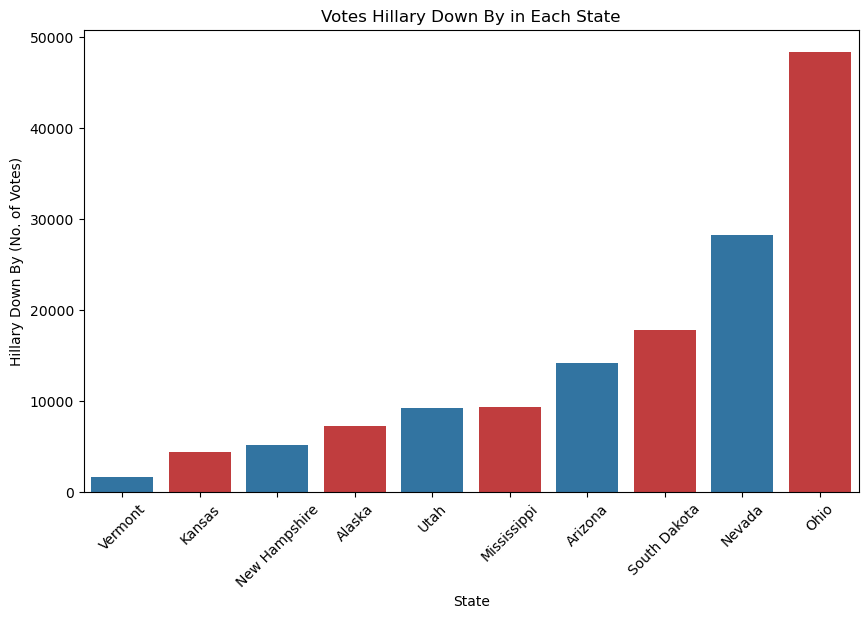

In [35]:
swing_states.hillary_up_by = swing_states.hillary_up_by.abs()

plt.figure(figsize=(10, 6))
palette = sns.color_palette(['#1f77b4', '#d62728']) 
sns.barplot(data=swing_states, x='state', y='hillary_up_by', palette=palette)
plt.xlabel('State')
plt.ylabel('Hillary Down By (No. of Votes)')
plt.title('Votes Hillary Down By in Each State')
plt.xticks(rotation=45)
plt.show()

This is a list of ten states where the race was closest in favor of Donald Trump. Perhaps the Democrats should focus on these states to shift the tides in the next elections.<br>
<br>
However it's important to look more closely both at the more granular county level information and also at the demographics data to look for clues of voting patterns for specific groups of people so we can find what the 'audience' is of each candidate.<br>
<br>
Before going into demographics let's try to find the counties with a small amount of votes in favor of trump and see which states have the largest amount of such counties. That might be a good indicator of which states were good targets for campaigning where a smaller amount of effort could bring more significant results.

In [36]:
hillary_votes = primary_results[(primary_results['candidate'] == 'Hillary Clinton')]\
                .groupby('county')['votes'].sum().reset_index()
trump_votes = primary_results[(primary_results['candidate'] == 'Donald Trump')]\
                .groupby('county')['votes'].sum().reset_index()

votes_merged = hillary_votes.merge(trump_votes, on='county', suffixes=('_hillary', '_trump'))

votes_merged['trump_up_by'] = votes_merged['votes_hillary'] - votes_merged['votes_trump'] 

votes_merged = votes_merged.drop(['votes_hillary', 'votes_trump'], axis=1)

counties_trump_won = votes_merged[votes_merged['trump_up_by'] > 0]

ten_percent = counties_trump_won['trump_up_by'].quantile(0.1)

small_losses = counties_trump_won[counties_trump_won['trump_up_by'] <= ten_percent]

small_losses_states = small_losses.merge(primary_results[['state', 'county']].drop_duplicates(), on='county')

state_count = small_losses_states['state'].value_counts()
state_count.head(10)

state
Vermont          30
Massachusetts    25
Maine             8
Connecticut       8
South Dakota      5
Iowa              5
Oklahoma          3
Texas             2
Georgia           2
Mississippi       1
Name: count, dtype: int64

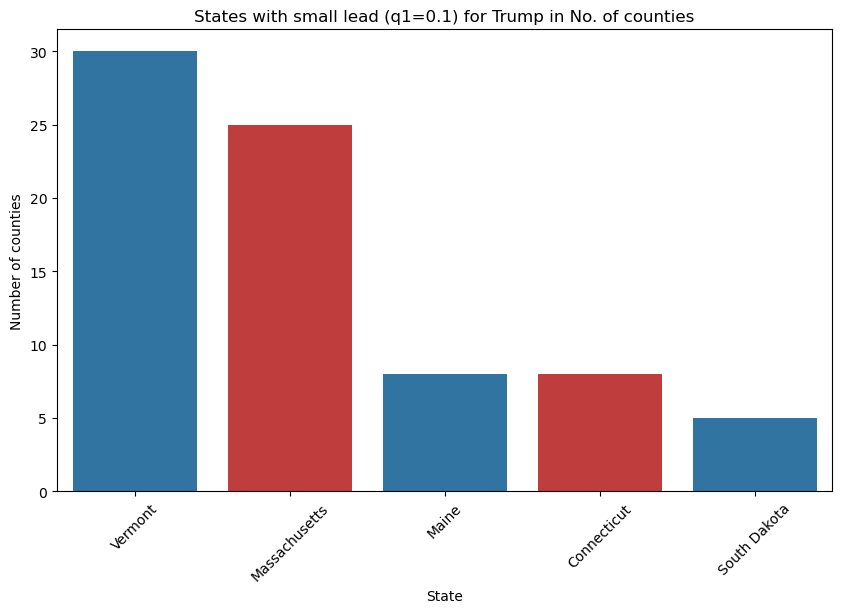

In [37]:
state_count_df = state_count.reset_index().head(5)
state_count_df.columns = ['state', 'count']

plt.figure(figsize=(10, 6))
palette = sns.color_palette(['#1f77b4', '#d62728']) 
sns.barplot(data=state_count_df, x='state', y='count', palette=palette)
plt.xlabel('State')
plt.ylabel('Number of counties')
plt.title('States with small lead (q1=0.1) for Trump in No. of counties')
plt.xticks(rotation=45)
plt.show()

Here we have the top counts of how many counties there were in each state where Trump had a small lead (up to 10% of the maximum lead). Perhaps these could be the best states for the Democrats to work on in the next campaign.

## 3. Correlation with US census data.

In this chapter we will look for voting patterns in the US census data, we'll try to find correlations between certain groups and their voting behaviour.<br>
<br>
It's probably best to use county level information for this part of the analysis, so we will have to merge the two dataframes.<br>
<br>
It is also time to choose which of the columns we will be using:<br>
1. White alone, percent, 2014
2. Black or African American alone, percent, 2014
3. Hispanic or Latino, percent, 2014
4. Foreign born persons, percent, 2009-2013
5. Bachelor's degree or higher, percent of persons age 25+, 2009-2013
6. Per capita money income in past 12 months (2013 dollars), 2009-2013
7. Total number of firms, 2007
8. Homeownership rate, 2009-2013<br>
<br>
I decided on these ones for the following reasons:<br>
White, black and hispanic are the three biggest ethnic groups in the US with the biggest impact.<br><br>
Trump's politics are somewhat against migrants in general so Foreign born persons should favor Hillary.<br><br>I was thinking of using Asian and Veteran data, but I decided that the groups aren't large enough as they amount to around 5% of the population.<br><br>Education could be a strong indicator or not. There are certain stereotypes about voters especially for Trump so it could be interesting.<br><br>Income is another interesting one, there was even a popular study made a few years back in Princeton University which claimed that it scientifically proved that voting has no impact unless you have a certain level of income, somewhere in the millions and that corruption is basically legal in the US so this should be important. Who do the rich favor?<br><br>
Perhaps a the amount of business owners could be related to a preference of either candidate, although we should convert this to businesses per capita.<br><br>Does a high level of homeownership mean more votes for either of the two candidates?<br><br>Let's try to find everything out, first we will need to select the appropriate columns and transpose, then merge the voting data with it.

In [38]:
list_of_columns = ['area_name', 'RHI125214', 'RHI225214', 'RHI725214',\
                   'POP645213', 'EDU685213', 'INC910213' , 'SBO001207',\
                   'HSG445213', 'PST045214'
                  ]

To select the rows of only the counties and Washington DC we will drop the row for the US in total and selec the ones where state abbreviation is not null.

In [39]:
county_rows = demographics.loc[
    (demographics['area_name'] != 'United States') & 
    (demographics['state_abbreviation'].notnull())
    ]
county_rows.shape

(3143, 54)

3143 is the correct number of US counties. Let's now select the required columns:

In [40]:
main_df = county_rows[list_of_columns].copy()

Let's also change the census codes to something that's easier on the eyes.

In [41]:
code_to_name = {
    'RHI125214': 'white',
    'RHI225214': 'african_american',
    'RHI725214': 'hispanic',
    'POP645213': 'foreign_born',
    'EDU685213': 'education',
    'INC910213': 'income',
    'SBO001207': 'businesses',
    'HSG445213': 'homeownership',
    'PST045214': 'population'
}
main_df.rename(columns=code_to_name, inplace=True)
main_df.set_index('area_name', inplace=True)
main_df

,white,african_american,hispanic,foreign_born,education,income,businesses,homeownership,population
area_name,,,,,,,,,
Autauga County,77.9,18.7,2.7,1.6,20.9,24571,4067,76.8,55395
Baldwin County,87.1,9.6,4.6,3.6,27.7,26766,19035,72.6,200111
Barbour County,50.2,47.6,4.5,2.9,13.4,16829,1667,67.7,26887
Bibb County,76.3,22.1,2.1,1.2,12.1,17427,1385,79.0,22506
Blount County,96.0,1.8,8.7,4.3,12.1,20730,4458,81.0,57719
...,...,...,...,...,...,...,...,...,...
Sweetwater County,94.3,1.5,15.8,5.5,18.1,30517,4052,71.5,45010
Teton County,94.9,1.2,15.2,9.1,48.7,43444,5974,59.1,22930
Uinta County,95.4,0.9,9.2,3.4,18.9,25513,1983,72.7,20904


Let's add the businesses per capita column.

In [42]:
main_df['businesses_per_capita'] = main_df['businesses'] / main_df['population']
main_df

,white,african_american,hispanic,foreign_born,education,income,businesses,homeownership,population,businesses_per_capita
area_name,,,,,,,,,,
Autauga County,77.9,18.7,2.7,1.6,20.9,24571,4067,76.8,55395,0.073418
Baldwin County,87.1,9.6,4.6,3.6,27.7,26766,19035,72.6,200111,0.095122
Barbour County,50.2,47.6,4.5,2.9,13.4,16829,1667,67.7,26887,0.062000
Bibb County,76.3,22.1,2.1,1.2,12.1,17427,1385,79.0,22506,0.061539
Blount County,96.0,1.8,8.7,4.3,12.1,20730,4458,81.0,57719,0.077236
...,...,...,...,...,...,...,...,...,...,...
Sweetwater County,94.3,1.5,15.8,5.5,18.1,30517,4052,71.5,45010,0.090024
Teton County,94.9,1.2,15.2,9.1,48.7,43444,5974,59.1,22930,0.260532
Uinta County,95.4,0.9,9.2,3.4,18.9,25513,1983,72.7,20904,0.094862


Great! Now we need to add two columns from the primary results dataset that will contain the number of votes received per capita for each of the two candidates in each county.

In [43]:
trump_counties = primary_results.loc[primary_results['candidate'] == 'Donald Trump', ['county', 'votes']]
trump_counties.set_index('county', inplace=True)

hillary_counties = primary_results.loc[primary_results['candidate'] == 'Hillary Clinton', ['county', 'votes']]
hillary_counties.set_index('county', inplace=True)

main_df.index = main_df.index.str.replace(' County', '')

trump_votes_agg = trump_counties.groupby('county')['votes'].sum().reset_index()
hillary_votes_agg = hillary_counties.groupby('county')['votes'].sum().reset_index()

main_df_reset = main_df.reset_index()

main_df_merged = main_df_reset.merge(trump_votes_agg, left_on='area_name', right_on='county', how='left')\
                             .merge(hillary_votes_agg, left_on='area_name', right_on='county', how='left')

main_df_merged.drop(columns=['county_x', 'county_y'], inplace=True)

main_df_merged.set_index('area_name', inplace=True)

main_df_merged['trump_up_by_per_capita'] = (main_df_merged['votes_x'] - main_df_merged['votes_y']) / main_df_merged['population'] * 10000
main_df_merged['hillary_up_by_per_capita'] = (main_df_merged['votes_y'] - main_df_merged['votes_x']) / main_df_merged['population'] * 10000

main_df_merged.drop(columns=['votes_x', 'votes_y'], inplace=True)

main_df_merged

,white,african_american,hispanic,foreign_born,education,income,businesses,homeownership,population,businesses_per_capita,trump_up_by_per_capita,hillary_up_by_per_capita
area_name,,,,,,,,,,,,
Autauga,77.9,18.7,2.7,1.6,20.9,24571,4067,76.8,55395,0.073418,541.565123,-541.565123
Baldwin,87.1,9.6,4.6,3.6,27.7,26766,19035,72.6,200111,0.095122,867.618472,-867.618472
Barbour,50.2,47.6,4.5,2.9,13.4,16829,1667,67.7,26887,0.062000,88.890542,-88.890542
Bibb,76.3,22.1,2.1,1.2,12.1,17427,1385,79.0,22506,0.061539,-2659.290856,2659.290856
Blount,96.0,1.8,8.7,4.3,12.1,20730,4458,81.0,57719,0.077236,2096.190163,-2096.190163
...,...,...,...,...,...,...,...,...,...,...,...,...
Sweetwater,94.3,1.5,15.8,5.5,18.1,30517,4052,71.5,45010,0.090024,NaN,NaN
Teton,94.9,1.2,15.2,9.1,48.7,43444,5974,59.1,22930,0.260532,286.088094,-286.088094
Uinta,95.4,0.9,9.2,3.4,18.9,25513,1983,72.7,20904,0.094862,NaN,NaN


So there's a few issues I encountered while performing the operation that had to be accounted for.<br>
<br>
I had to rename the area_name column's values to not contain the extra ' County' and reset the index for merging. Then I noticed that there are multiple entries for the same state in the primary results data, I'm not exactly sure why that is but I decided to group by county and sum the votes.<br>
<br>
I also decided to count the number of votes the candidate is up by and calculate the number per capita to show how much support the candidate received in each county.<br>
<br>
And with that we can finally start to look at correlations, compare the two candidates based on specific demographics and see how they measure up, finally we will try to visualize each candidates strong and weak points in the chosen areas.

In [44]:
df_trump = main_df_merged.drop('hillary_up_by_per_capita', axis = 1).dropna()
df_hillary = main_df_merged.drop('trump_up_by_per_capita', axis = 1).dropna()

I'll calculate correlations for each candidate and drop the null values in each of the two dataframes to retain more data.

In [45]:
list_of_demographics = ['white', 'african_american', 'hispanic', 'foreign_born',\
                        'education','income', 'businesses_per_capita', 'homeownership']

print('Trump votes correlation with demographics:')
for demographic in list_of_demographics:
    correlation = main_df_merged[[demographic, 'trump_up_by_per_capita']].corr().iloc[0, 1]
    print(f'     {demographic}: {correlation}')
print('Hillary votes correlation with demographics:')
for demographic in list_of_demographics:
    correlation = main_df_merged[[demographic, 'hillary_up_by_per_capita']].corr().iloc[0, 1]
    print(f'     {demographic}: {correlation}')

Trump votes correlation with demographics:
     white: 0.028607614950366768
     african_american: -0.029729099037175168
     hispanic: 0.015781386750107554
     foreign_born: 0.05732361099298398
     education: -0.007388134034397495
     income: 0.02483491700137996
     businesses_per_capita: -0.026432481786178828
     homeownership: -0.07441608638450325
Hillary votes correlation with demographics:
     white: -0.028607614950366768
     african_american: 0.029729099037175168
     hispanic: -0.015781386750107554
     foreign_born: -0.05732361099298398
     education: 0.007388134034397495
     income: -0.02483491700137996
     businesses_per_capita: 0.026432481786178828
     homeownership: 0.07441608638450325


So there doesn't seem to be any strong or medium strength correlations between the demographics and how well the candidates performed.<br>
<br>
I will attempt to fit a linear regression model on the data and see if we can find any good predictors.

In [46]:
X = df_trump[list_of_demographics]
y = df_trump['trump_up_by_per_capita']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     trump_up_by_per_capita   R-squared:                       0.021
Model:                                OLS   Adj. R-squared:                  0.018
Method:                     Least Squares   F-statistic:                     7.382
Date:                    Wed, 11 Sep 2024   Prob (F-statistic):           9.14e-10
Time:                            13:54:42   Log-Likelihood:                -34366.
No. Observations:                    2818   AIC:                         6.875e+04
Df Residuals:                        2809   BIC:                         6.880e+04
Df Model:                               8                                         
Covariance Type:                nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

The F-statistic is very low (9.14e-10), indicating that the model as a whole is statistically significant.<br><br>Some predictors, such as 'hispanic', 'foreign_born', 'education', 'income', and 'homeownership', are statistically significant, indicating they have an influence on trump_up_by_per_capita.<br>
<br>
Each additional unit in the 'hispanic' demographic variable is associated with a decrease of approximately 273 in trump_up_by_per_capita. (p-value = 0.007)<br><br>
Each additional unit in the 'foreign_born' demographic variable is associated with an increase of approximately 795 in trump_up_by_per_capita. (p-value = 0.004)<br><br>
Each additional unit in the 'education' variable is associated with a decrease of approximately 910 in trump_up_by_per_capita. (p-value = 0.000)<br><br>
Each additional unit in the 'income' variable is associated with an increase of approximately 1.12 in trump_up_by_per_capita.(p-value = 0.000)<br><br>
Each additional unit in the 'homeownership' variable is associated with a decrease of approximately 832 in trump_up_by_per_capita. (p-value = 0.000)<br><br>
And the exact opposite is true for Hillary Clinton. So perhaps this could be some useful information for Democrats going forward:<br>
They could try to adjust their campaign to favor people with larger incomes.<br><br>
It's interesting that the less educated like Trump, maybe it's important to understand why that is, it could be due to his charisma and ability to put on a good show. Maybe instead of trying to be the 'voice of reason' the Democrats should consider a more relaxed, easily digestable way of presenting themselves to the masses.<br><br>
It's also strange to see that more immigrants is assosiated with more votes for Trump despite the fact that he's sometimes labeled as nationalist or even downright racist. Maybe the Democrats should try to understand why Trump is liked by foreigners and how they could present themselves better to this demographic.<br><br>
Let's look at the most favorable states for Hillary based on these statistics:

In [47]:
hispanic_states = demographics[demographics['state_abbreviation'].isnull()][['area_name', 'RHI725214']]\
.sort_values(by='RHI725214', ascending=False).head(5)
hispanic_states

,area_name,RHI725214
1827,New Mexico,47.7
191,California,38.6
2567,Texas,38.6
99,Arizona,30.5
1776,Nevada,27.8


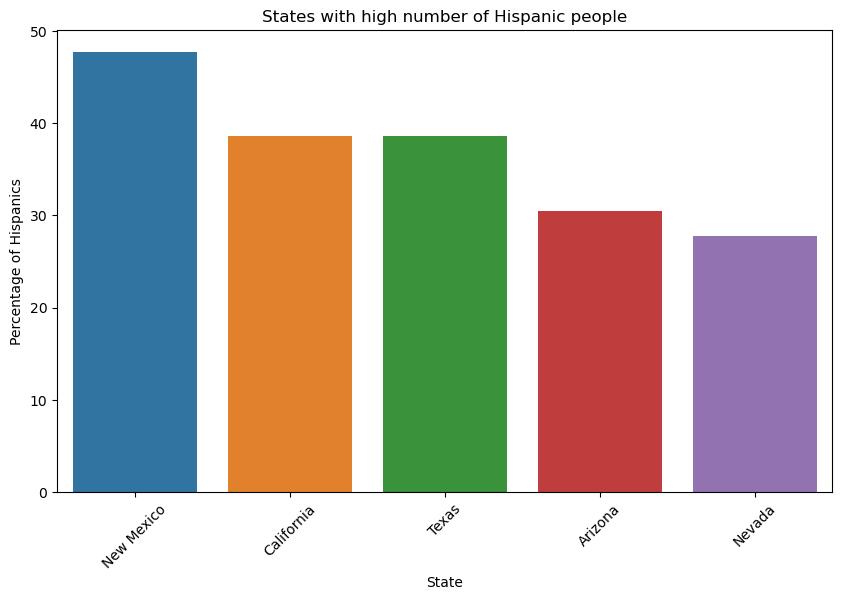

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(data=hispanic_states, x='area_name', y='RHI725214')
plt.xlabel('State')
plt.ylabel('Percentage of Hispanics')
plt.title('States with high number of Hispanic people')
plt.xticks(rotation=45)
plt.show()

In [49]:
educated_states = demographics[demographics['state_abbreviation'].isnull()][['area_name', 'EDU685213']]\
.sort_values(by='EDU685213', ascending=False).head(5)
educated_states

,area_name,EDU685213
328,District Of Columbia,52.4
1239,Massachusetts,39.4
250,Colorado,37.0
1214,Maryland,36.8
315,Connecticut,36.5


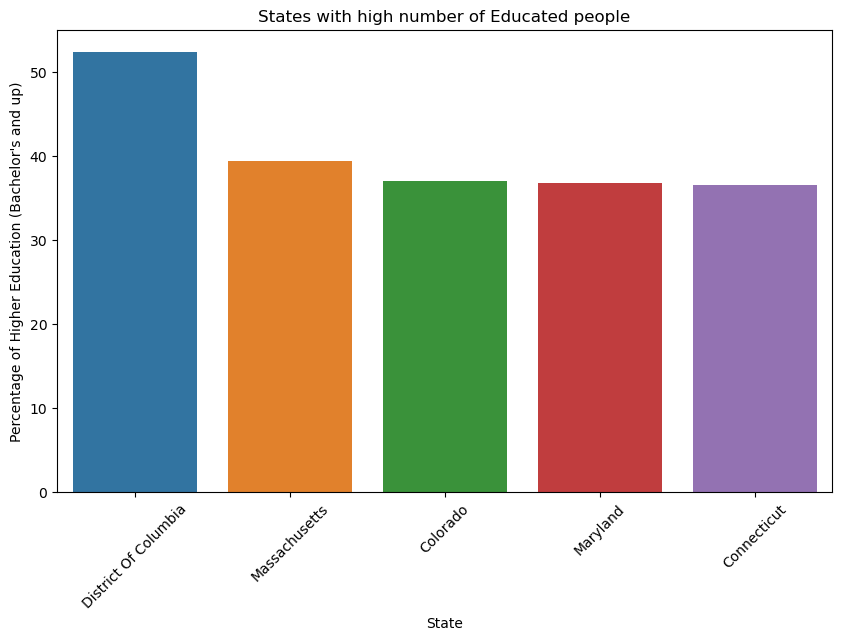

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(data=educated_states, x='area_name', y='EDU685213')
plt.xlabel('State')
plt.ylabel('Percentage of Higher Education (Bachelor\'s and up)')
plt.title('States with high number of Educated people')
plt.xticks(rotation=45)
plt.show()

## 4. Summary

Although the data we have is merely for the primaries, we still attempted to uncover areas of strength and weakness for both candidates and find insights that could be used by the Democrats in the future to improve their results.<br>
<br>
We found the states where the Democrats lost by small margins and could easily shift the tides:
Vermont, Maine, Connecticut, Massachusetts.<br>
And we also found areas where perhaps there is no reason to try and change people's minds as the tides sway too heavy against their favor:
Washington, Indiana, Nebraska.<br><br>
We identified regions where The Democrats perform best - the East and Southeastern parts. And also the worst - West, Northwest. The biggest fight seems to be centered around the more neutral central planes.<br><br>
We looked at demographic groups and found some indications that Hillary was preferred over Trump by Hispanics, the well educated, homeowners and people with lower income whereas Trump is preferred by the wealthy and foreigners, perhaps by people who can't afford homes and are starting to think that perhaps the immigrants are to blame.<br><br>
However the truth is that Trump is not real. Trump is a feeling that we all get when we are stuck in traffic and think to ourselves - "Why are all these people here? Go home." Sometimes people annoy you too much and you just feel Trump.<br><br> Jokes aside, there seems to be a resurgance of nationalism and right wing politics in the world, even war is making a comeback. Maybe the Democrats just need to show more strength and ability to deal with crisis. Hopefully they will use my insights to win in the future.